In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import os
import matplotlib.pyplot as plt
%matplotlib inline
_FOLDER= "../results/"

In [2]:
df_properties = pd.read_csv(_FOLDER+"merged_fitted_sigmoid4_123_with_drugs_properties.csv")
df_properties.head()

,Unnamed: 0,DRUG_ID,COSMIC_ID,fd_num_0,fd_num_1,fd_num_2,fd_num_3,fd_num_4,fd_num_5,fd_num_6,...,undefined_atom_stereo_count,B,defined_atom_stereo_count,molecular_formula,second_target,"Other, kinases",Metabolism,JNK and p38 signaling,Drug_Name,Cytoskeleton
0,0,1024,905965,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,3.0,C26H21N3O4,JAK2,1,0,0,Lestaurtinib,0
1,1,1024,1327766,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,3.0,C26H21N3O4,JAK2,1,0,0,Lestaurtinib,0
2,2,1024,905950,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,3.0,C26H21N3O4,JAK2,1,0,0,Lestaurtinib,0
3,3,1024,906838,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,3.0,C26H21N3O4,JAK2,1,0,0,Lestaurtinib,0
4,4,1024,1240130,0,0.111111,0.222222,0.333333,0.444444,0.555556,0.666667,...,0.0,0.0,3.0,C26H21N3O4,JAK2,1,0,0,Lestaurtinib,0


### Range of values for coefficients

In [3]:
# df_properties[["param_1", "param_2", "param_3", "param_4"]].describe().to_csv("results/statistics_of_sigmoid_coefficients.csv")

df = pd.read_csv(_FOLDER+"/statistics_of_sigmoid_coefficients.csv")
df

,Unnamed: 0,param_1,param_2,param_3,param_4
0,count,2552.000000,2552.000000,2552.000000,2552.000000
1,mean,0.595153,1.015645,-18.726096,0.083078
2,std,1.126783,1.583531,24.034201,0.188226
3,min,-12.736131,-34.997070,-282.743080,-2.794251
4,25%,0.390470,1.013264,-20.404264,0.005235
5,50%,0.497662,1.065409,-13.008631,0.047810
6,75%,0.614729,1.198409,-8.723061,0.174261
7,max,10.323221,31.910531,10.077512,1.295399


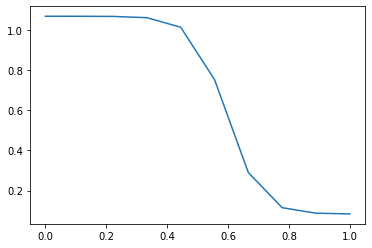

In [4]:
### General sigmoid_4_param curves
x0 = 0.595
L = 1.015
k = -18.72
d = 0.083
x = np.linspace(0,1, 10)
y = 1/ (L + np.exp(-k*(x-x0))) + d
plt.plot(x,y); 

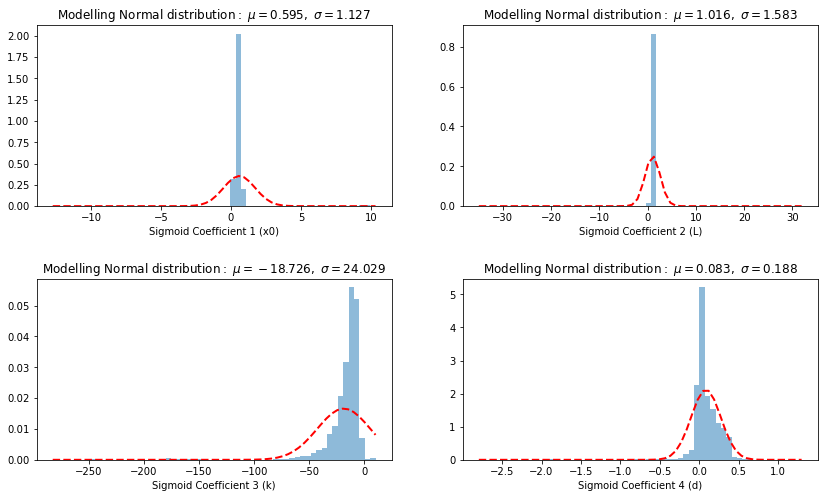

In [5]:
coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}

fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
bins=60
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    param_values = df_properties["param_"+str(i)].values
    ax.hist(param_values, density=True, bins=bins, alpha=0.5)
    ax.set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")")
    
    (mu, sigma) = norm.fit(param_values)
    x = np.linspace(param_values.min(), param_values.max(), bins)
    y = norm.pdf(x, mu, sigma)
    ax.plot(x,y, 'r--', linewidth=2)
    ax.set_title(r'$\mathrm{Modelling\ Normal\ distribution:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma));

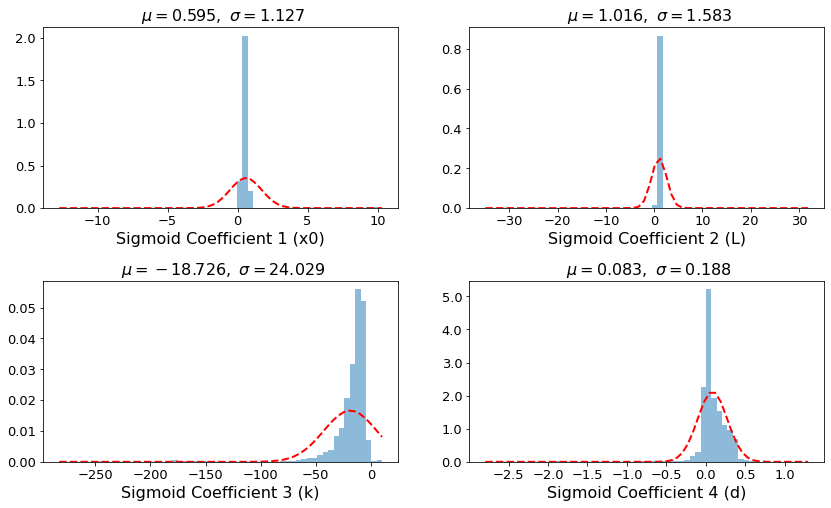

In [23]:
coef_mapping= {1: "x0", 2: "L", 3: "k", 4: "d"}

fig = plt.figure(figsize=(14, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.2)
bins=60
# plt.xticks(fontsize=12)
for i in range(1,5):
    ax = fig.add_subplot(2, 2, i)
    param_values = df_properties["param_"+str(i)].values
    ax.hist(param_values, density=True, bins=bins, alpha=0.5)
    ax.set_xlabel("Sigmoid Coefficient "+str(i)+ " ("+coef_mapping[i]+")", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=13)
    (mu, sigma) = norm.fit(param_values)
    x = np.linspace(param_values.min(), param_values.max(), bins)
    y = norm.pdf(x, mu, sigma)
    ax.plot(x,y, 'r--', linewidth=2)
    ax.set_title(r'$\mathrm{}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma), fontsize=16)
    if i ==4:
        ax.set_yticklabels([0.0, 1.0, 2.0, 3.0, 4.0, 5.0], fontsize=13) ;

In [25]:
fig.savefig(_FOLDER+"paramters_distribution_2.png", transparent=True )